# Dataset 1

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [19]:
data = pd.read_csv('criptodata.csv')
data.columns = [
    'Date',
    'Name',
    'Symbol',
    'TVL',
    'MarketCap',
    'Price',
    'Class',
    ]

In [20]:
data.head()

,Date,Name,Symbol,TVL,MarketCap,Price,Class
0,2025-05-13,Shiba Inu,SHIB,61077841482,9.297761e+09,0.000016,Meme
1,2025-05-12,Shiba Inu,SHIB,62780123532,9.366638e+09,0.000016,Meme
2,2025-05-11,Shiba Inu,SHIB,63659583748,9.964431e+09,0.000017,Meme
3,2025-05-10,Shiba Inu,SHIB,59952189316,8.844981e+09,0.000015,Meme
4,2025-05-09,Shiba Inu,SHIB,57638038262,8.440423e+09,0.000014,Meme


In [21]:
data = data.drop(['Name'], axis=1)

In [22]:
data

,Date,Symbol,TVL,MarketCap,Price,Class
0,2025-05-13,SHIB,61077841482,9.297761e+09,0.000016,Meme
1,2025-05-12,SHIB,62780123532,9.366638e+09,0.000016,Meme
2,2025-05-11,SHIB,63659583748,9.964431e+09,0.000017,Meme
3,2025-05-10,SHIB,59952189316,8.844981e+09,0.000015,Meme
4,2025-05-09,SHIB,57638038262,8.440423e+09,0.000014,Meme
...,...,...,...,...,...,...
10399,2023-01-02,AIOZ,1005473548,2.129980e+07,0.031821,IA
10400,2023-01-01,AIOZ,1004217523,2.133805e+07,0.032051,IA
10401,2022-12-31,AIOZ,1006395136,2.144855e+07,0.032140,IA
10402,2022-12-30,AIOZ,1010835879,2.163433e+07,0.032130,IA


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10404 entries, 0 to 10403
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10404 non-null  object 
 1   Symbol     10404 non-null  object 
 2   TVL        10404 non-null  int64  
 3   MarketCap  10404 non-null  float64
 4   Price      10404 non-null  float64
 5   Class      10404 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 487.8+ KB


In [24]:
data.nunique()

,0
Date,867
Symbol,12
TVL,7794
MarketCap,10399
Price,10403
Class,4


In [25]:
data['Date'] = pd.to_datetime(data['Date'])
data['Symbol'] = data['Symbol'].astype('category')
data['Class'] = data['Class'].astype('category')

data.head()

,Date,Symbol,TVL,MarketCap,Price,Class
0,2025-05-13,SHIB,61077841482,9.297761e+09,0.000016,Meme
1,2025-05-12,SHIB,62780123532,9.366638e+09,0.000016,Meme
2,2025-05-11,SHIB,63659583748,9.964431e+09,0.000017,Meme
3,2025-05-10,SHIB,59952189316,8.844981e+09,0.000015,Meme
4,2025-05-09,SHIB,57638038262,8.440423e+09,0.000014,Meme


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10404 entries, 0 to 10403
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10404 non-null  datetime64[ns]
 1   Symbol     10404 non-null  category      
 2   TVL        10404 non-null  int64         
 3   MarketCap  10404 non-null  float64       
 4   Price      10404 non-null  float64       
 5   Class      10404 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(2), int64(1)
memory usage: 346.2 KB


In [27]:
data.isnull().sum()

,0
Date,0
Symbol,0
TVL,0
MarketCap,0
Price,0
Class,0


In [28]:
data.duplicated().sum()

np.int64(0)

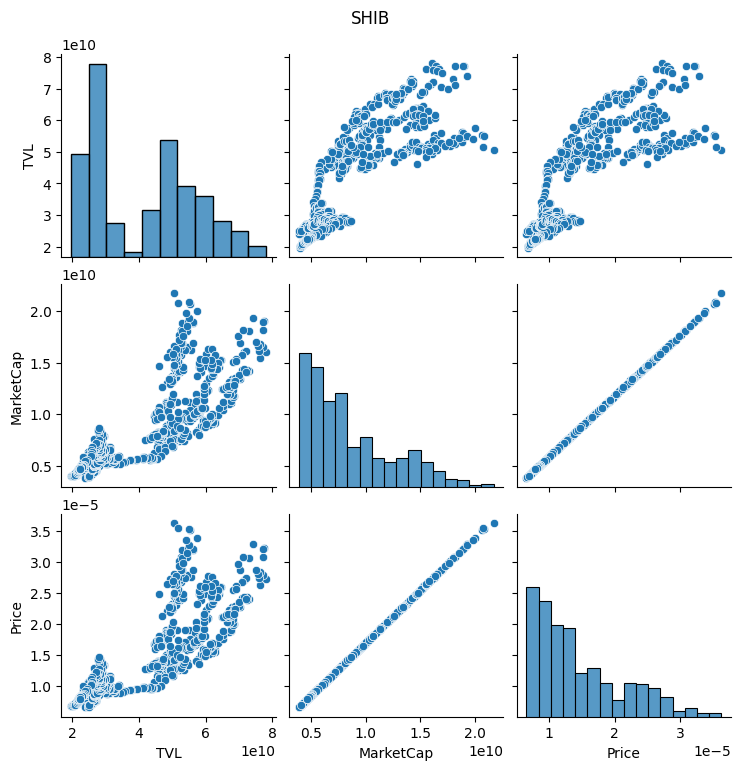

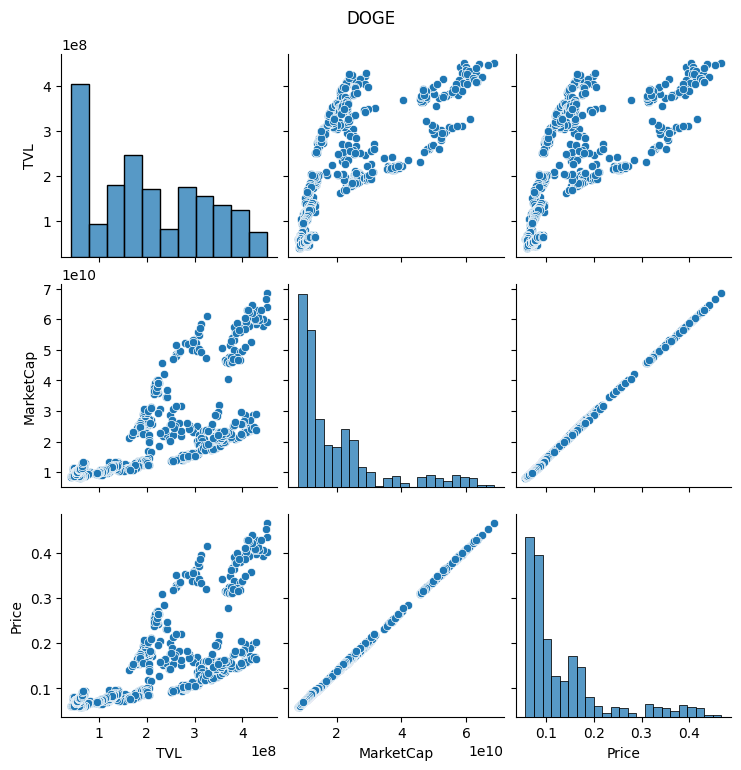

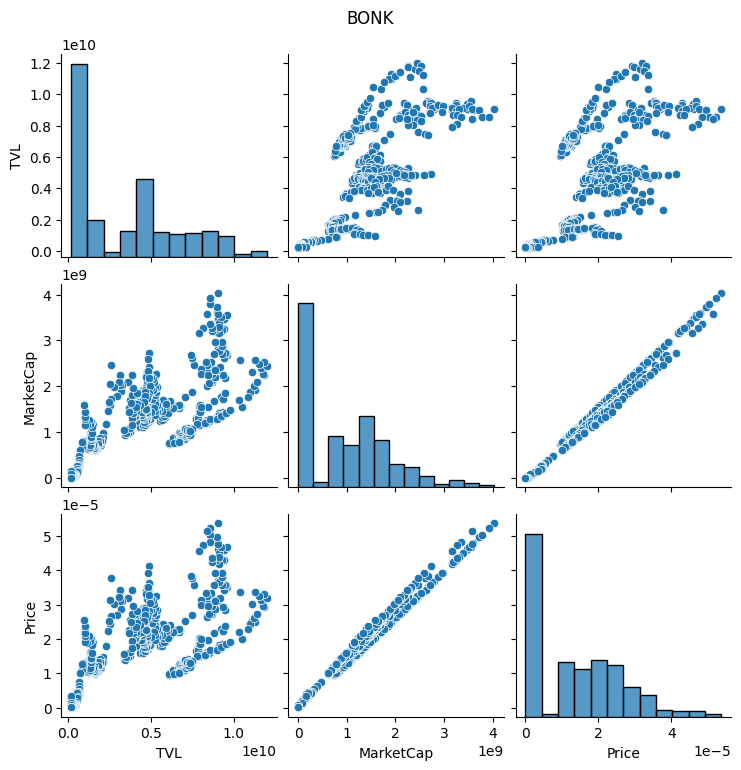

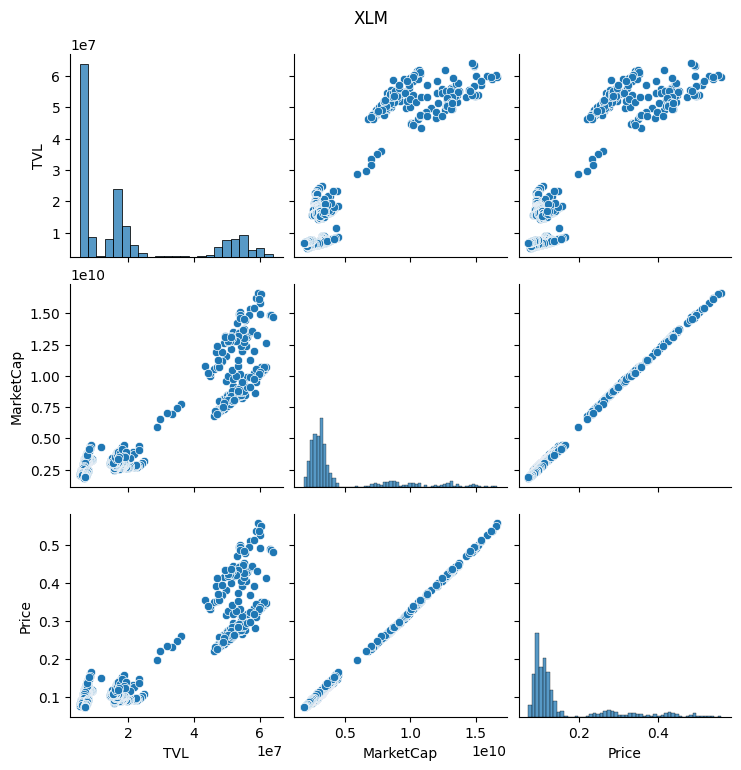

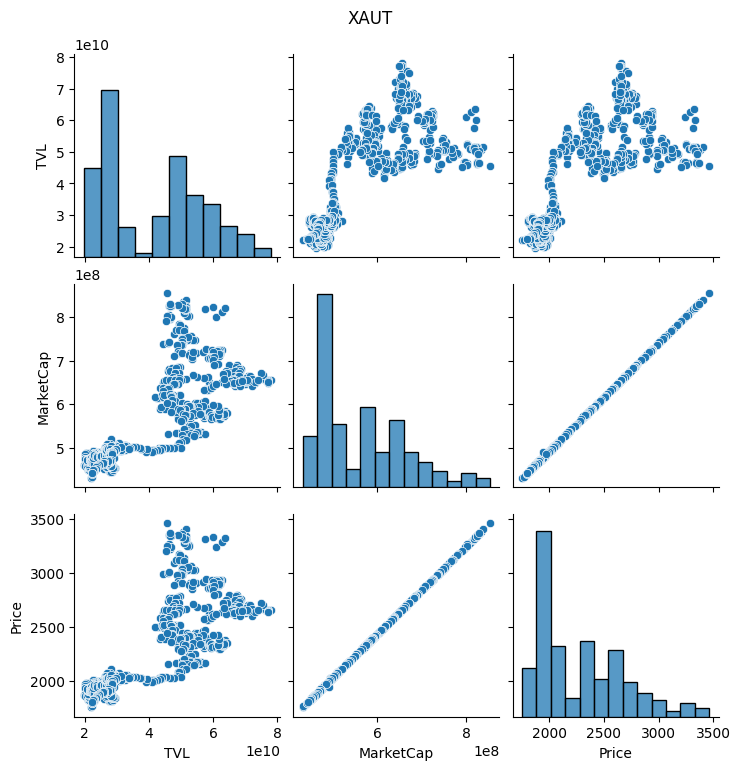

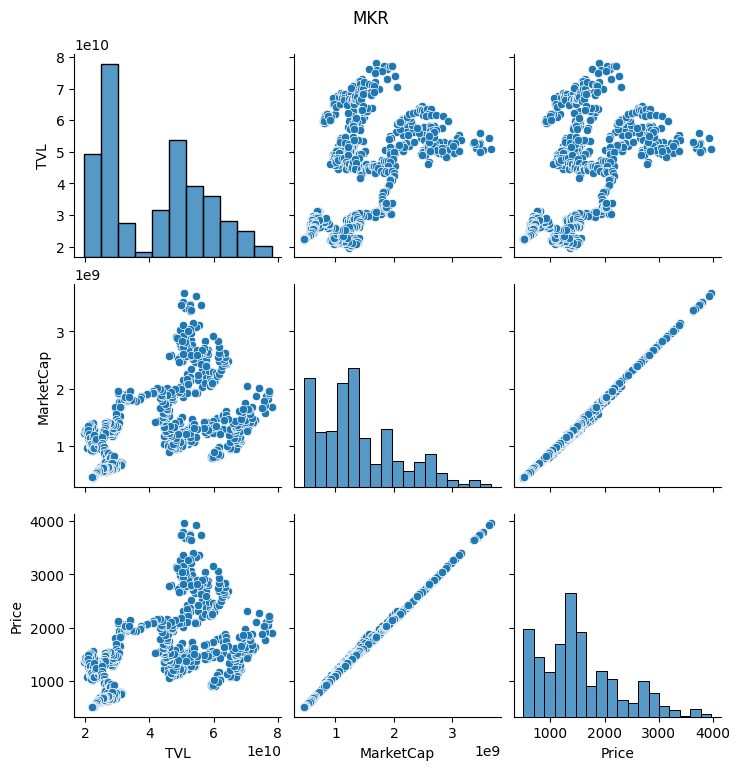

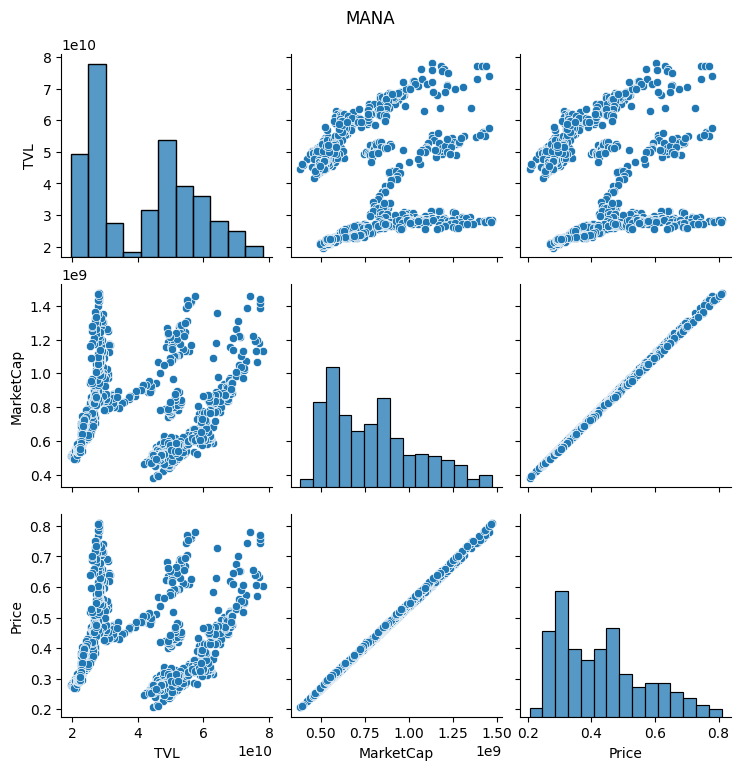

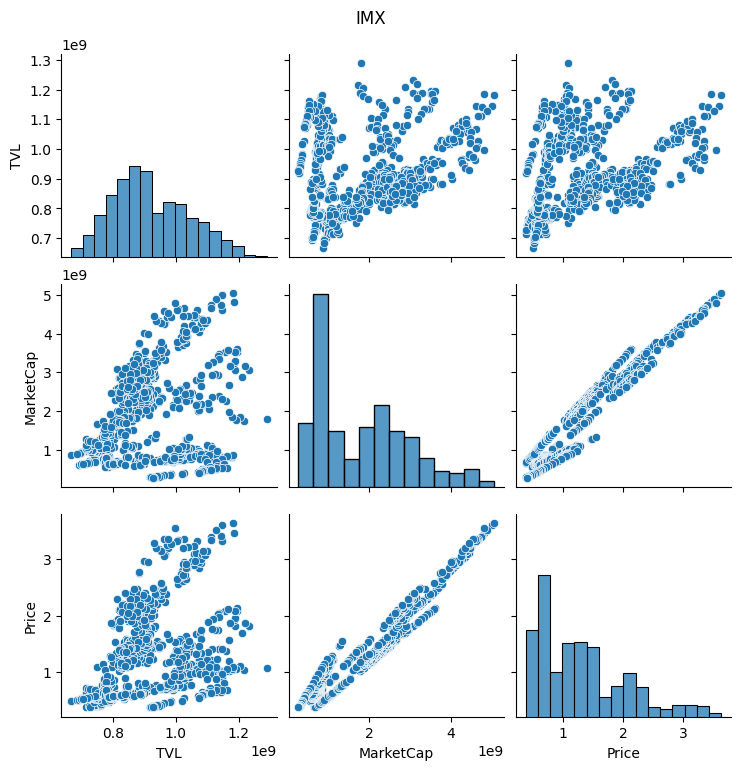

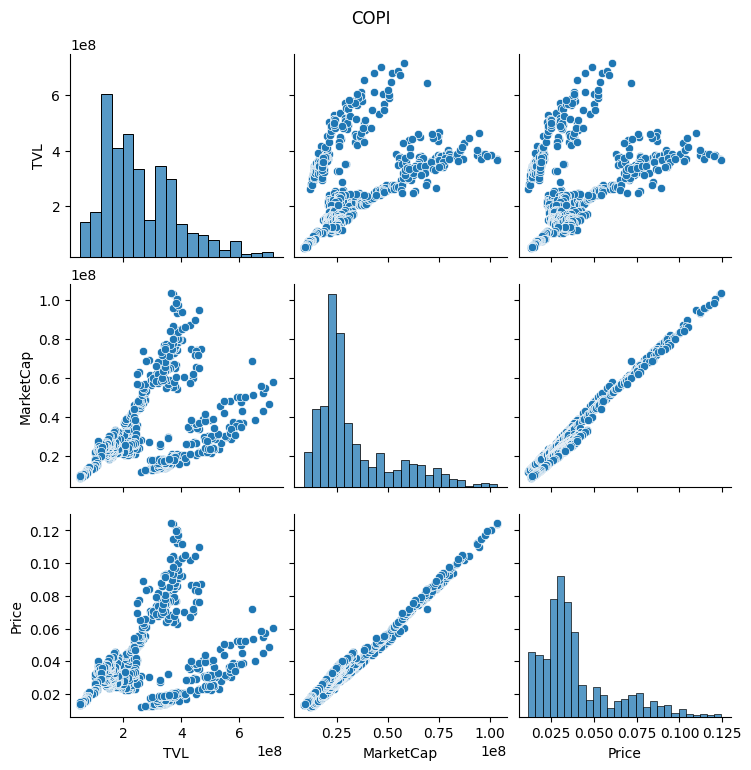

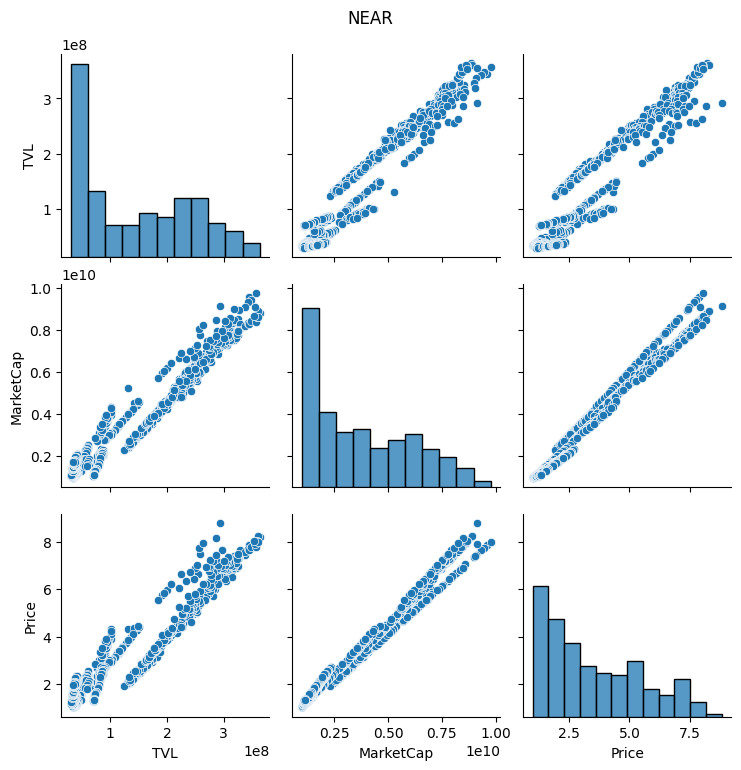

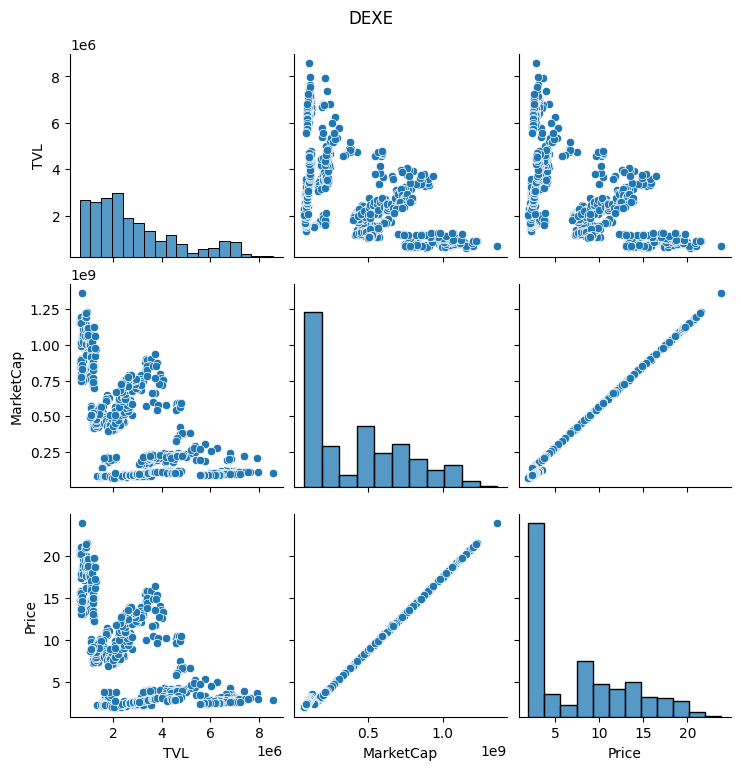

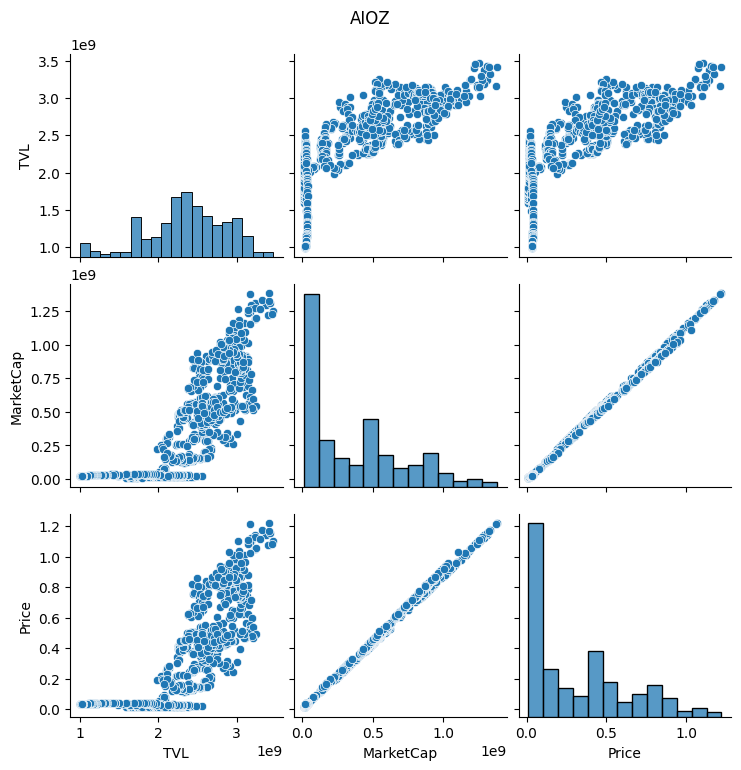

In [29]:
for symbol in data['Symbol'].unique():
    subset = data[data['Symbol'] == symbol]
    sns.pairplot(subset)
    plt.suptitle(symbol, y=1.02)
    plt.show()

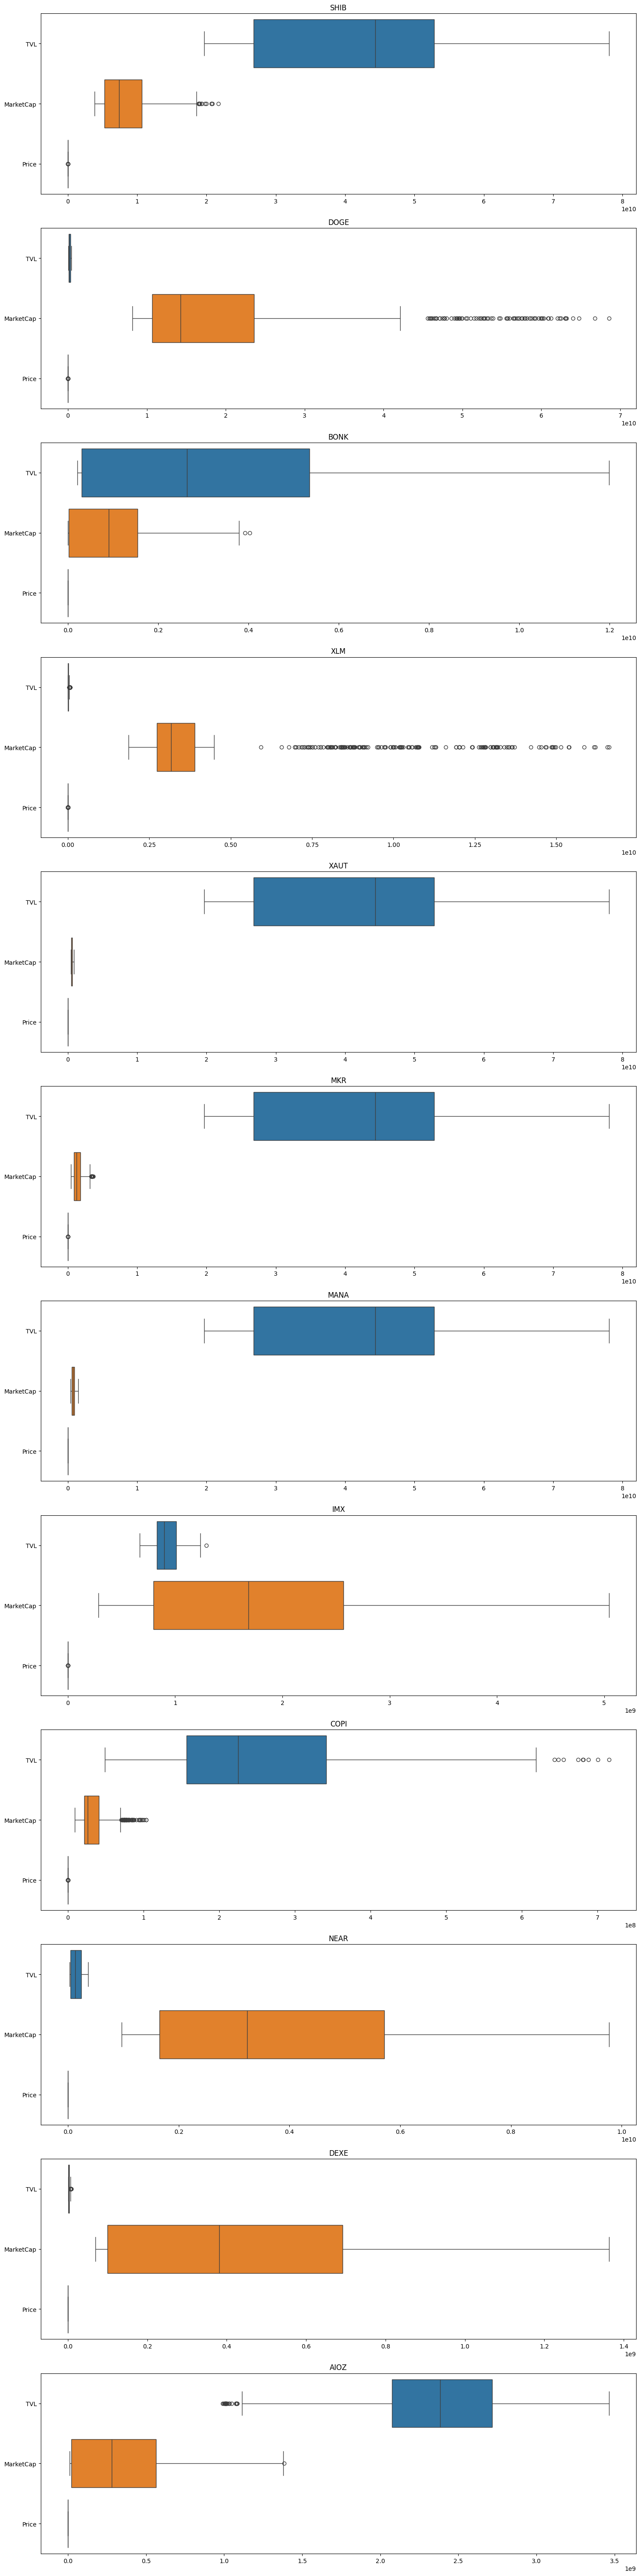

In [30]:
symbols = data['Symbol'].unique()
num_symbols = len(symbols)

plt.figure(figsize=(15, 5 * num_symbols))

for i, symbol in enumerate(symbols):
    plt.subplot(num_symbols, 1, i + 1)
    subset = data[data['Symbol'] == symbol]
    sns.boxplot(data=subset.drop(columns=['Symbol']), orient='h')
    plt.title(f'{symbol}')

plt.tight_layout()
plt.show()

In [31]:
import pandas as pd

def porcentaje_outliers_por_columna(df):
    porcentajes = {}
    for col in df.select_dtypes(include=['number']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)][col]
        porcentaje = 100 * len(outliers) / len(df)
        porcentajes[col] = round(porcentaje, 2)
    return pd.Series(porcentajes, name='Porcentaje de Outliers')

print(porcentaje_outliers_por_columna(data))


TVL           2.08
MarketCap    14.29
Price        19.82
Name: Porcentaje de Outliers, dtype: float64


<Axes: >

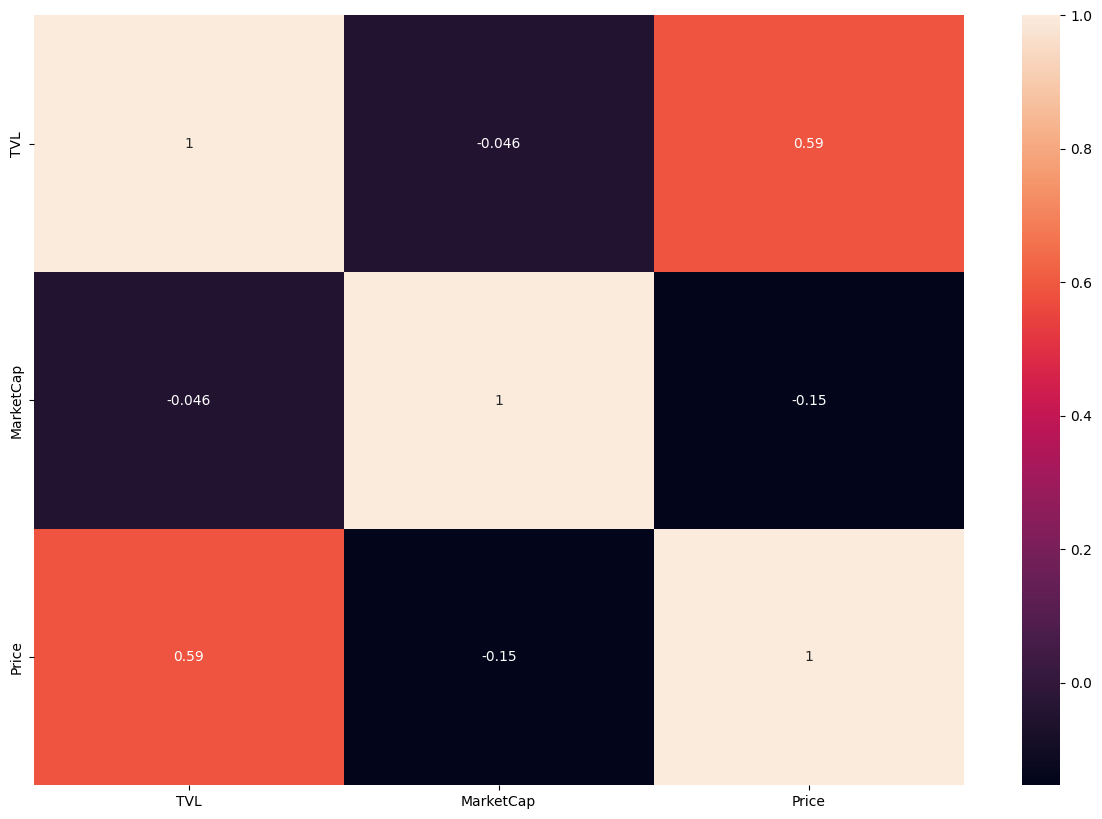

In [32]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.drop(['Date', 'Symbol', 'Class'], axis=1).corr(), annot=True)

# Dataset 2

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [34]:
data = pd.read_csv('criptodata2.csv')

In [35]:
data.head()

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2025-05-09,2025-05-10,2.747336,2.976433,2.723532,2.895147,7.966233e+08,3.465271e+09
1,2025-05-08,2025-05-09,2.290229,2.739521,2.281262,2.724449,4.886795e+08,3.030394e+09
2,2025-05-07,2025-05-08,2.331400,2.383205,2.230589,2.285697,4.155200e+08,2.787348e+09
3,2025-05-06,2025-05-07,2.318966,2.349534,2.245305,2.331353,2.828670e+08,2.787216e+09
4,2025-05-05,2025-05-06,2.328401,2.397632,2.302583,2.320049,2.652861e+08,2.842840e+09


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Start       1669 non-null   object 
 1   End         1669 non-null   object 
 2   Open        1669 non-null   float64
 3   High        1669 non-null   float64
 4   Low         1669 non-null   float64
 5   Close       1669 non-null   float64
 6   Volume      1669 non-null   float64
 7   Market Cap  1669 non-null   float64
dtypes: float64(6), object(2)
memory usage: 104.4+ KB


In [37]:
data['Date'] = pd.to_datetime(data['Start'])
data.insert(0, 'Date', data.pop('Date'))

data.drop(['Start', 'End'], axis=1, inplace=True)

data.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2025-05-09,2.747336,2.976433,2.723532,2.895147,7.966233e+08,3.465271e+09
1,2025-05-08,2.290229,2.739521,2.281262,2.724449,4.886795e+08,3.030394e+09
2,2025-05-07,2.331400,2.383205,2.230589,2.285697,4.155200e+08,2.787348e+09
3,2025-05-06,2.318966,2.349534,2.245305,2.331353,2.828670e+08,2.787216e+09
4,2025-05-05,2.328401,2.397632,2.302583,2.320049,2.652861e+08,2.842840e+09


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1669 non-null   datetime64[ns]
 1   Open        1669 non-null   float64       
 2   High        1669 non-null   float64       
 3   Low         1669 non-null   float64       
 4   Close       1669 non-null   float64       
 5   Volume      1669 non-null   float64       
 6   Market Cap  1669 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 91.4 KB


In [39]:
data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Market Cap,0


In [40]:
data.duplicated().sum()

np.int64(0)

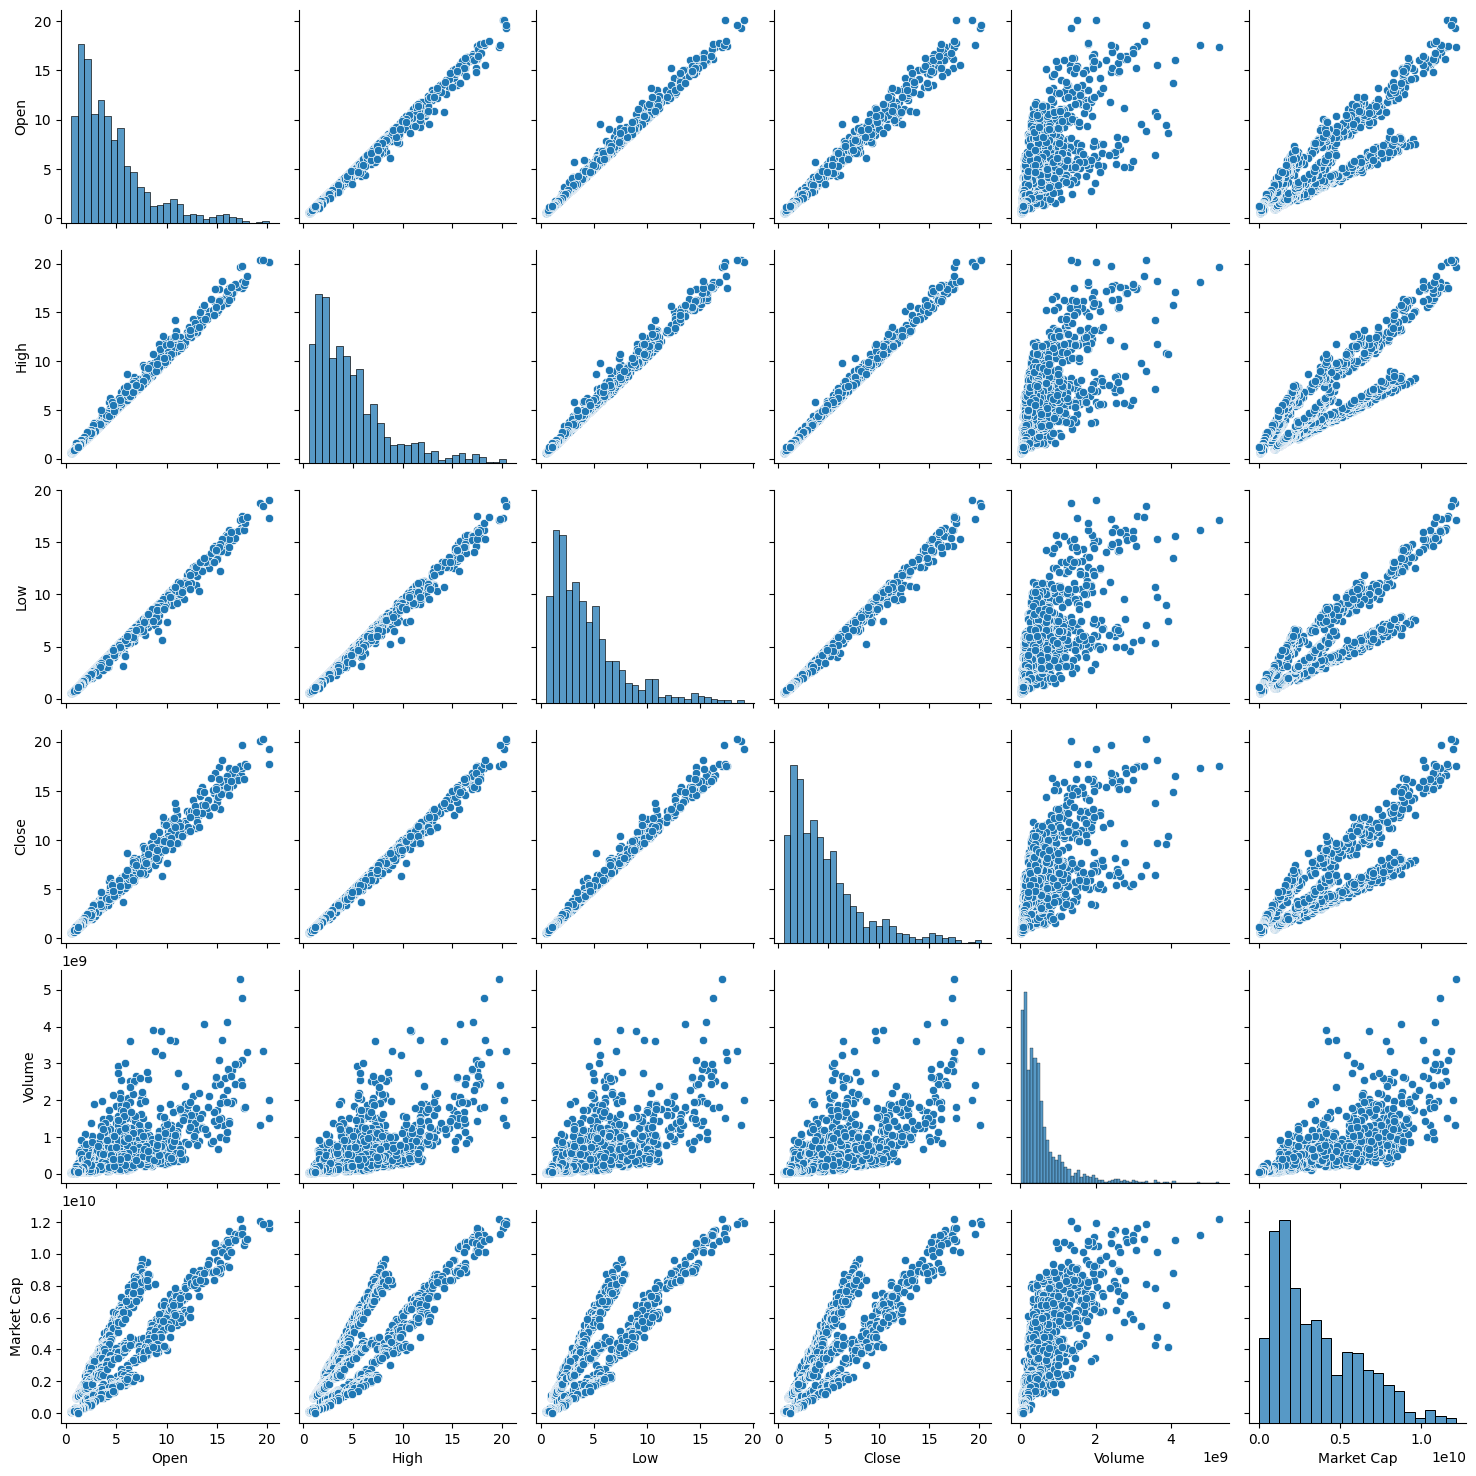

In [41]:
sns.pairplot(data)

<Axes: >

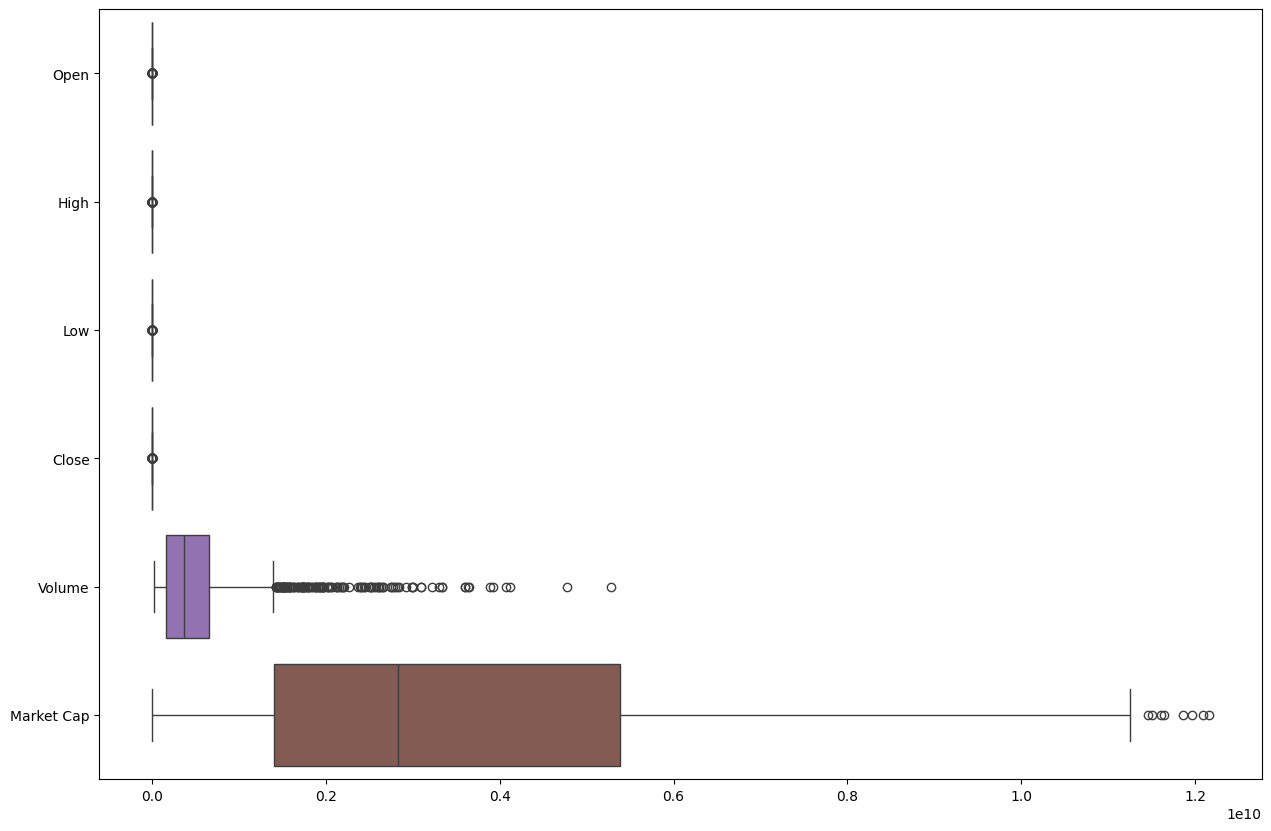

In [42]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=data, orient='h')

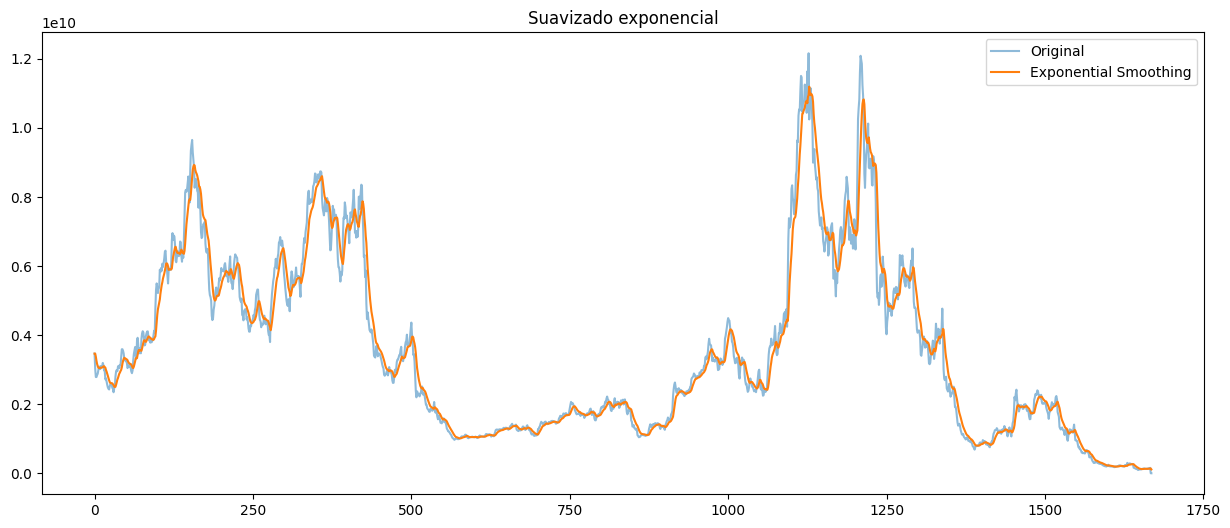

In [43]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

ses_model = SimpleExpSmoothing(data['Market Cap']).fit(smoothing_level=0.2, optimized=False)
data['Market Cap Smooth'] = ses_model.fittedvalues


plt.figure(figsize=(15, 6))
plt.plot(data['Market Cap'], label='Original', alpha=0.5)
plt.plot(data['Market Cap Smooth'], label='Exponential Smoothing')
plt.legend()
plt.title('Suavizado exponencial')
plt.show()

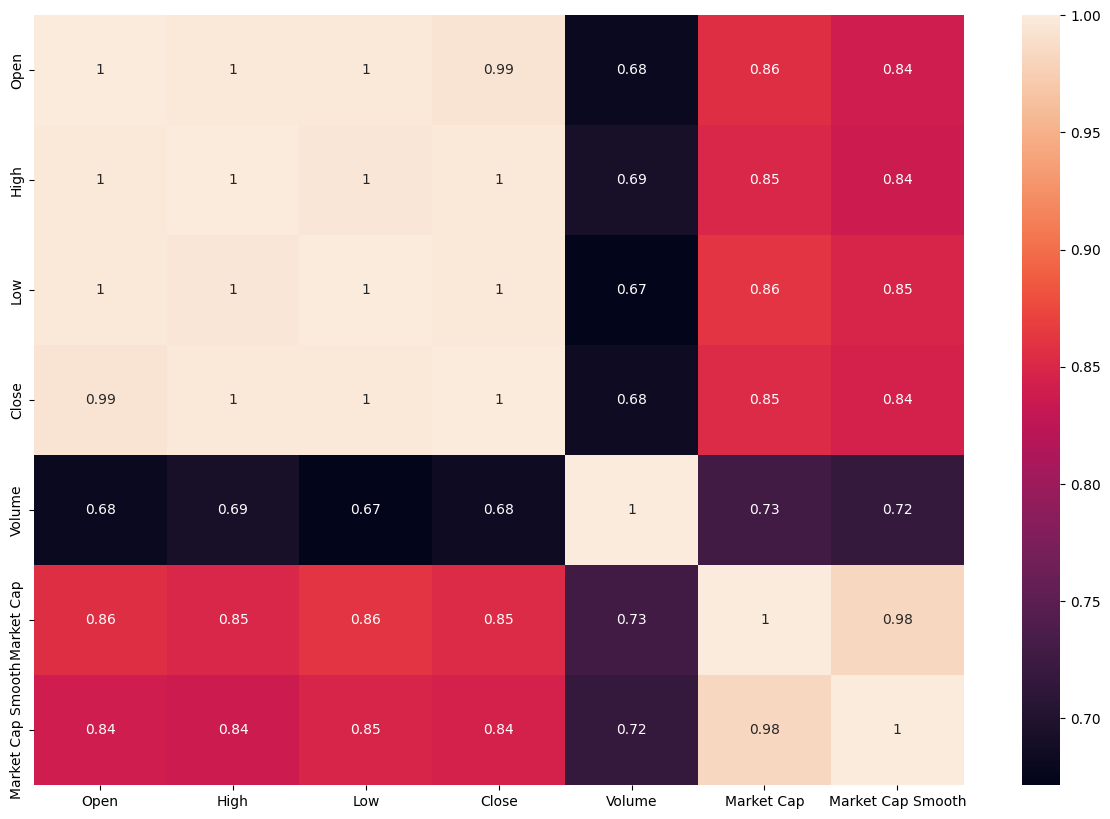

In [44]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.drop('Date', axis=1).corr(), annot=True)
plt.show()

In [45]:
data

,Date,Open,High,Low,Close,Volume,Market Cap,Market Cap Smooth
0,2025-05-09,2.747336,2.976433,2.723532,2.895147,7.966233e+08,3.465271e+09,3.465271e+09
1,2025-05-08,2.290229,2.739521,2.281262,2.724449,4.886795e+08,3.030394e+09,3.465271e+09
2,2025-05-07,2.331400,2.383205,2.230589,2.285697,4.155200e+08,2.787348e+09,3.378296e+09
3,2025-05-06,2.318966,2.349534,2.245305,2.331353,2.828670e+08,2.787216e+09,3.260106e+09
4,2025-05-05,2.328401,2.397632,2.302583,2.320049,2.652861e+08,2.842840e+09,3.165528e+09
...,...,...,...,...,...,...,...,...
1664,2020-10-18,0.808574,0.871469,0.802287,0.871016,4.591787e+07,1.448164e+08,1.317836e+08
1665,2020-10-17,0.817904,0.857013,0.726276,0.808040,8.097295e+07,1.382133e+08,1.343902e+08
1666,2020-10-16,1.125216,1.148851,0.813440,0.817802,6.120328e+07,1.562425e+08,1.351548e+08
1667,2020-10-15,1.167162,1.240177,1.086936,1.124783,4.739661e+07,0.000000e+00,1.393723e+08


<Axes: >

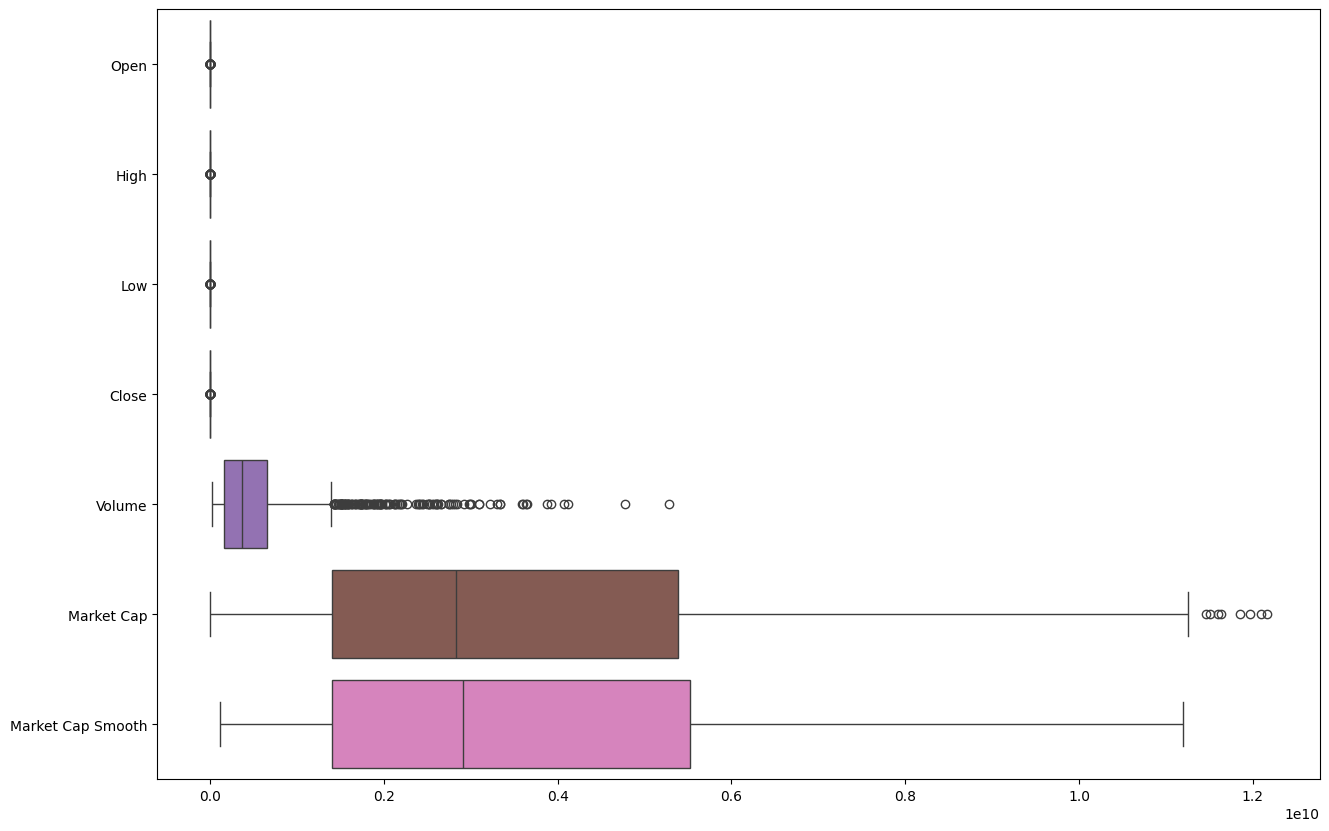

In [46]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=data, orient='h')

In [47]:
print(porcentaje_outliers_por_columna(data))

Open                 4.73
High                 5.15
Low                  4.43
Close                4.91
Volume               7.91
Market Cap           0.48
Market Cap Smooth    0.00
Name: Porcentaje de Outliers, dtype: float64


In [48]:

def variables_con_correlacion_alta(df, umbral=0.6):
    corr_matrix = df.corr(numeric_only=True)
    correlaciones_altas = []

    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            corr_value = corr_matrix.iloc[i, j]
            if abs(corr_value) > umbral:
                correlaciones_altas.append((col1, col2, round(corr_value, 3)))

    return pd.DataFrame(correlaciones_altas, columns=['Variable 1', 'Variable 2', 'Correlación'])

print(variables_con_correlacion_alta(data, umbral=0.6))


    Variable 1         Variable 2  Correlación
0         Open               High        0.997
1         Open                Low        0.997
2         Open              Close        0.993
3         Open             Volume        0.680
4         Open         Market Cap        0.855
5         Open  Market Cap Smooth        0.839
6         High                Low        0.996
7         High              Close        0.997
8         High             Volume        0.693
9         High         Market Cap        0.850
10        High  Market Cap Smooth        0.837
11         Low              Close        0.996
12         Low             Volume        0.671
13         Low         Market Cap        0.861
14         Low  Market Cap Smooth        0.847
15       Close             Volume        0.684
16       Close         Market Cap        0.854
17       Close  Market Cap Smooth        0.844
18      Volume         Market Cap        0.728
19      Volume  Market Cap Smooth        0.717
20  Market Ca